In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist =tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4720 - accuracy: 0.8668
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1095 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0369 - accuracy: 0.9884


In [7]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 893us/step - loss: 0.0924 - accuracy: 0.9721
0.09244557470083237 0.972100019454956


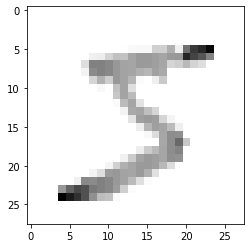

In [8]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [10]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions=new_model.predict([x_test])

In [16]:
print(predictions)

[[1.50709205e-08 4.90818977e-08 1.75094810e-05 ... 9.99959230e-01
  1.33360860e-08 7.84980472e-08]
 [1.07436415e-08 4.51203465e-01 5.48788190e-01 ... 2.27284502e-09
  1.54164077e-08 8.08644818e-13]
 [3.33496075e-08 9.99917150e-01 1.75416267e-06 ... 1.67917858e-06
  6.96721108e-05 4.94918559e-08]
 ...
 [1.53801416e-10 1.01746501e-07 6.11157915e-08 ... 8.12640246e-06
  1.07708843e-06 9.08179061e-07]
 [1.31190814e-06 1.05201563e-08 3.04354919e-09 ... 6.99671929e-08
  2.54046954e-05 5.05089803e-10]
 [2.81557160e-08 3.74292902e-10 6.04596234e-11 ... 2.64548485e-15
  3.35625999e-10 2.25853797e-12]]


In [17]:
import numpy as np
print(np.argmax(predictions[0]))

7


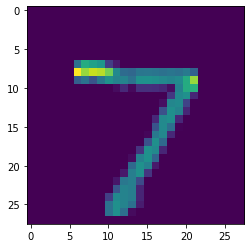

In [19]:
plt.imshow(x_test[0])